In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import sqlite3
from make_ddf_survey import generate_ddf_scheduled_obs

In [2]:
con = sqlite3.connect('season_length_check_seasonfrac0.1_v2.2_10yrs.db')
sql = 'select observationStartMJD as mjd from observations where note like "%DD%" and filter="i";'
obs1 = pd.read_sql(sql, con)
con.close()

con = sqlite3.connect('season_length_check_seasonfrac0.3_v2.2_10yrs.db')
obs2 = pd.read_sql(sql, con)
con.close()


In [3]:
cum1 = np.arange(obs1['mjd'].size)
cum2 = np.arange(obs2['mjd'].size)


Text(0, 0.5, 'N obs')

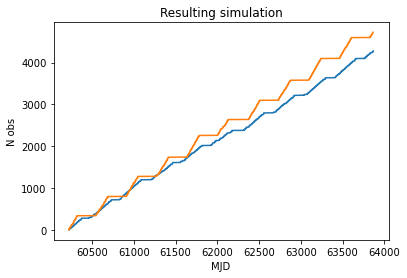

In [4]:
plt.plot(obs1['mjd'], cum1)
plt.plot(obs2['mjd'], cum2)
plt.title('Resulting simulation')
plt.xlabel('MJD')
plt.ylabel('N obs')

In [5]:
# Let's see what we tried to generate. Do they match
gen1 = generate_ddf_scheduled_obs(season_frac=0.1)
gen2 = generate_ddf_scheduled_obs(season_frac=0.3)

Optimizing XMM_LSS
Optimizing XMM_LSS


Text(0, 0.5, 'N obs')

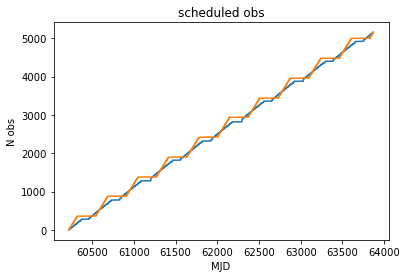

In [6]:
good = np.where(gen1['filter'] == "i")[0]
plt.plot(gen1['mjd'][good], np.arange(gen1[good].size))

good = np.where(gen2['filter'] == "i")[0]

plt.plot(gen2['mjd'][good], np.arange(gen2[good].size))
plt.title('scheduled obs')
plt.xlabel('MJD')
plt.ylabel('N obs')

In [7]:
gen1


array([(0, 0.62322798, -0.08290314, 60224.25      , 60226.25      , 30., 'u', 0., 0., 0., 0., 1, 'DD:XMM_LSS', 0.01041667, 0.05235988, 0.43633231, 1.48352986, 3., 21., False,     0),
       (0, 0.62322798, -0.08290314, 60224.25      , 60226.25      , 30., 'u', 0., 0., 0., 0., 1, 'DD:XMM_LSS', 0.01041667, 0.05235988, 0.43633231, 1.48352986, 3., 21., False,     1),
       (0, 0.62322798, -0.08290314, 60224.25      , 60226.25      , 30., 'u', 0., 0., 0., 0., 1, 'DD:XMM_LSS', 0.01041667, 0.05235988, 0.43633231, 1.48352986, 3., 21., False,     2),
       ...,
       (0, 0.62322798, -0.08290314, 63867.28124915, 63869.28124915, 30., 'y', 0., 0., 0., 0., 2, 'DD:XMM_LSS', 0.01041667, 0.05235988, 0.43633231, 1.48352986, 3., 21., False, 26829),
       (0, 0.62322798, -0.08290314, 63867.28124915, 63869.28124915, 30., 'y', 0., 0., 0., 0., 2, 'DD:XMM_LSS', 0.01041667, 0.05235988, 0.43633231, 1.48352986, 3., 21., False, 26830),
       (0, 0.62322798, -0.08290314, 63867.28124915, 63869.28124915, 30., 

In [8]:
gen1['scripted_id']

array([    0,     1,     2, ..., 26829, 26830, 26831])